## Reaktions-Diffusions-System

Partielle Differentialgleichungen beschreiben dynamische Systeme. Bei diesem Ipython Notebook wird das [FitzHugh-Nagumo-Modell](https://de.wikipedia.org/wiki/FitzHugh-Nagumo-Modell) verwendet.

Ein Reaktions-Diffusion-System basiert auf zwei wesentlichen Prozessen.

- Eine Reaktion d.h. eine Zustandsänderung
- Diffusion d.h. eine lokale Verbreitung

http://www.theshapeofmath.com/princeton/dynsys/pattern

Alain Turing (1952) nutzte als erster ein Raktions-Diffusions-System um die Morphogenese von farbigen Mustern auf dem Fell von Tieren wie Zebra, Giraffe oder Kudu zu erklären.

https://de.wikipedia.org/wiki/Turing-Mechanismus



In [36]:
# Bibliotheken importieren
# Source from http://ipython-books.github.io/featured-05/

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Differentialgleichungen für zwei Variablen $u(t)$ und $v(t)$


\begin{align*}
\frac{\partial u}{\partial t} &= a \Delta u + u - u^3 - v + k\\
\tau\frac{\partial v}{\partial t} &= b \Delta v + u - v\\
\end{align*}

- u(t) ist die Konzentration der einen Substanz
- v(t) ist die Konzentration der anderen Substanz

Vier Konstanten werden für die Simulation verwendet.

In [38]:
a = 2.8e-4 #2.8e-4
b = 5e-3
tau = .1
k = -.005


Diskeretisierung von Raum und Zeit mit der Bedingung

$$dt \leq \frac{dx^2}{2}$$

In [39]:
size = 100  # size of the 2D grid
dx = 2./size  # space step

T = 1.0  # total time
dt = .9 * dx**2/2  # time step
n = int(T/dt)



In [40]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

Diskreter Laplace Operator in 2D

Fünf Punkte Finite Differenzen Methode


$$\Delta u(x,y) \simeq \frac{u(x+h,y)+u(x-h,y)+u(x,y+h)+u(x,y-h)-4u(x,y)}{dx^2}$$

Ränder werden nicht berechnet

In [41]:
# Berechnung des Laplace ohne Ränder
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2


Das System wird wie folgt simuliert:

- Zu jedem Zeitschritt werden die rechten Seiten der Gleichung (ortsabhägniger Laplace) an jedem Ort berechnet.
- Als zweites werden die Variablen $u$ und $v$ angepasst, mit Hilfe einer diskreten Ableitung nach der Zeit.

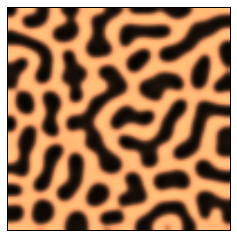

In [65]:
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    # We update the variables.
    U[1:-1,1:-1], V[1:-1,1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k), \
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]

plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

# 2. Muster

In [133]:
#Initalisierung

a = 5.8e-4 #2.8e-4
b = 5e-3
tau = .01 #gepunktet
k = -.015


U = np.random.rand(size, size)
V = np.random.rand(size, size)

([], <a list of 0 Text yticklabel objects>)

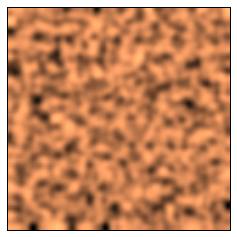

In [134]:
# 2. Berechnung
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    # We update the variables.
    U[1:-1,1:-1], V[1:-1,1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k), \
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]

plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);